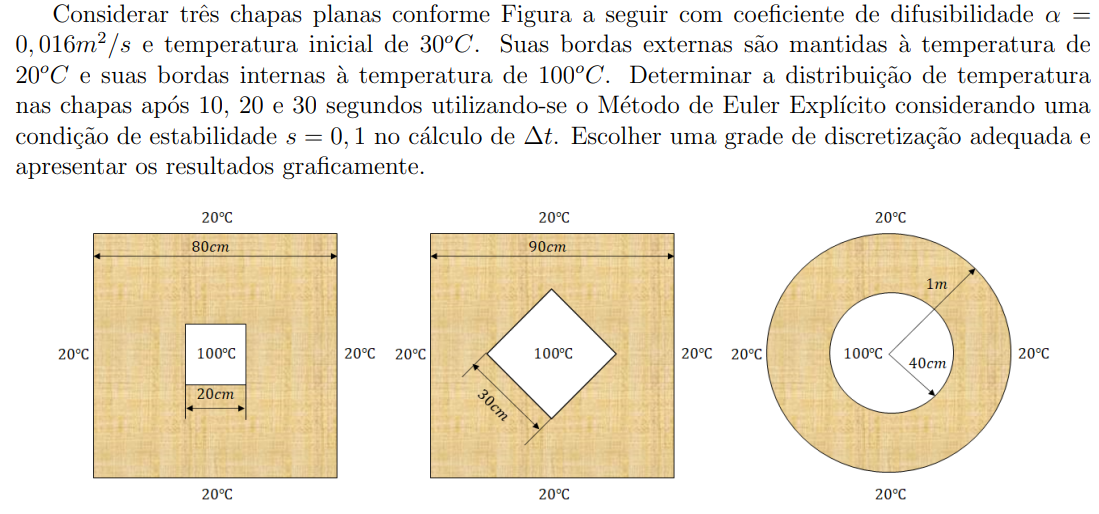

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# T[i, j] = (T[i+1, j] + To[i-1, j] + To[i, j+1] + To[i, j-1])/4
time = 1
te = 20
L = 0.8
n = 40
a = 0.016
s = 0.1
dx = L/n
dy = dx
dt = s/(a*(1/dx**2 + 1/dy**2))

x = np.linspace(0, L, n)
y = np.linspace(0, L, n)

T = 30 * np.ones([n, n]) 

T[1:n-1, 0] = te
T[1:n-1, n-1] = te
T[0, 1:n-1] = te
T[n-1, 1:n-1] = te

T[0, 0] = 20
T[0, n-1] = 20
T[n-1, 0] = 20
T[n-1, n-1] = 20

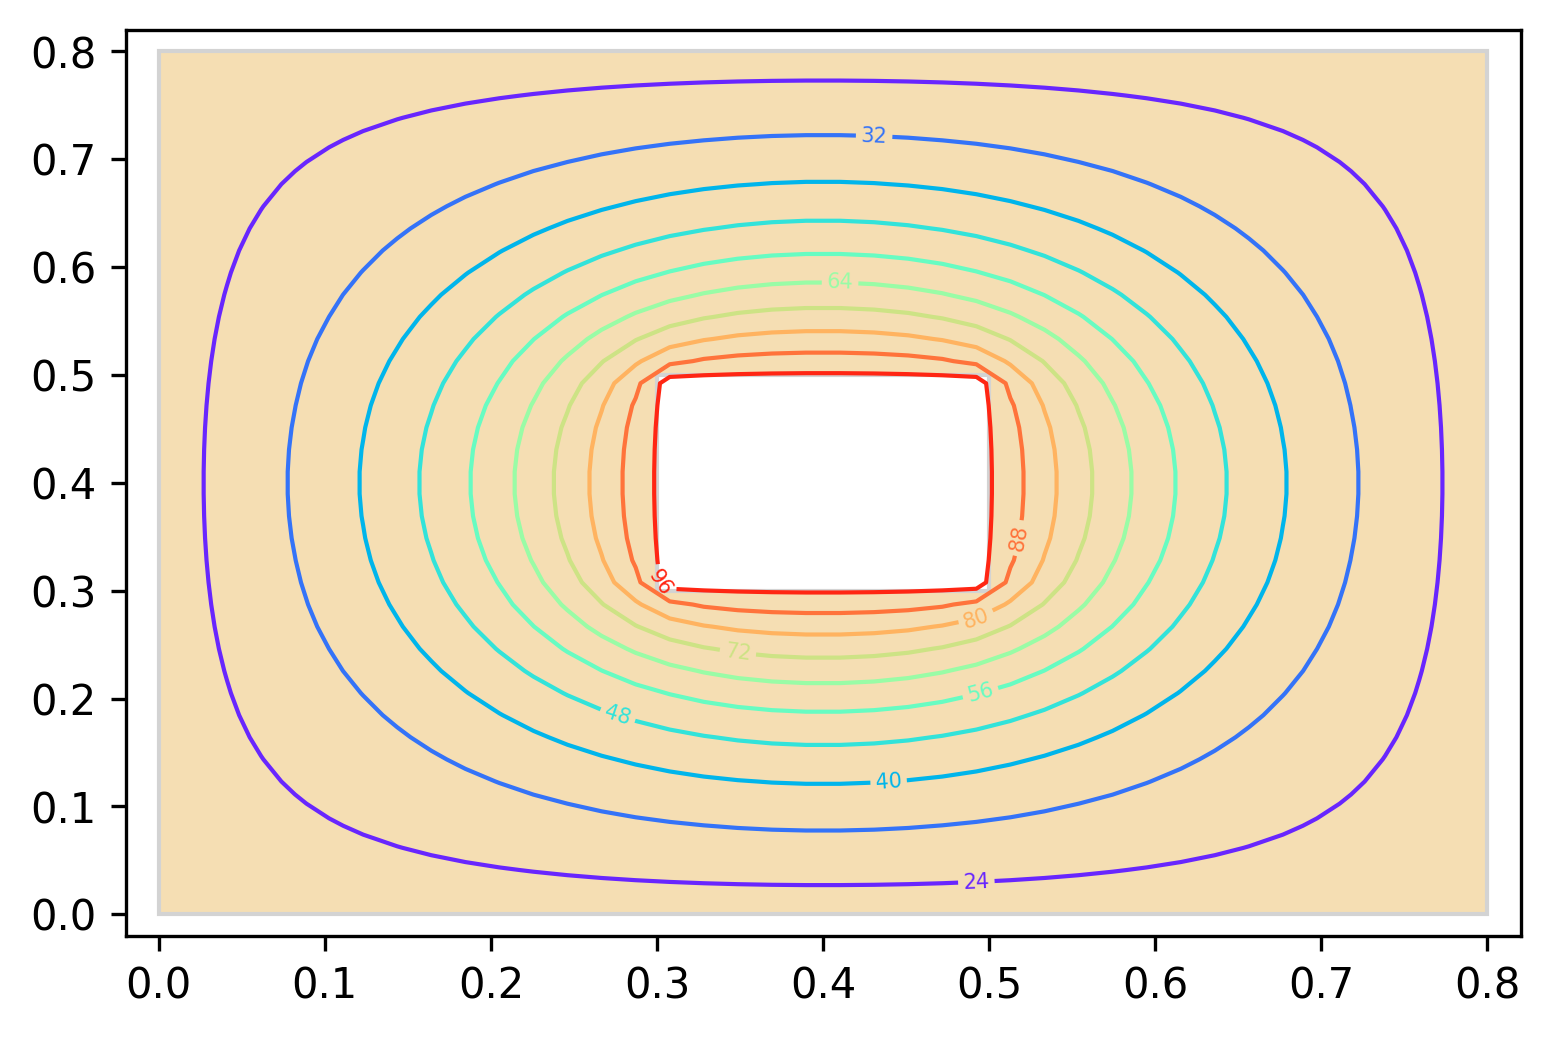

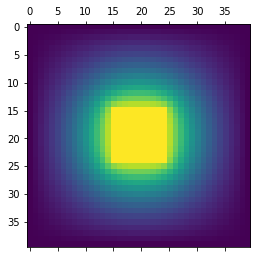

In [46]:
# calc
m = int(n/2)
size = int(m/4)

t = 0
while t <= time:
    To = T.copy()
    for j in range(1, n-1):
        for i in range(1, n-1):
            T[i, j] = To[i, j] + dt*a*(((To[i-1, j] - 2*To[i, j] + To[i+1, j])/dx**2) + ((To[i, j-1] - 2*To[i,j] + To[i, j+1])/dy**2))
            for k in range(int(n/4)):
                T[m-size+k, m-size:m+size] = 100
    t += dt



plt.figure(dpi=300)
plt.ylim([-0.02,0.82])
plt.xlim([-0.02, 0.82])
X, Y = np.meshgrid(x, y)
graf = plt.contour(X, Y, T, 9, vmin=20, vmax=100, linewidths=1, cmap='rainbow')
plt.clabel(graf, fontsize=5)
rectangle1 = plt.Rectangle((0,0), 0.8, 0.8, edgecolor='lightgrey', facecolor='wheat')
rectangle2 = plt.Rectangle((0.3, 0.3), 0.2, 0.2, edgecolor='lightgrey', facecolor='white')
plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.show()
plt.matshow(T)